### Importing required packages and classes

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM, GRU
from tensorflow.python.keras.layers import Dropout
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Analyzing Google Stock 

In [7]:
data = pd.read_csv('D:/Data Science Methods and Tools/Data Science Project/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/googl.us.txt', sep=',', header=0).fillna(0)
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [8]:
data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
3328,2017-11-06,1049.10,1052.59,1042.00,1042.68,913954,0
3329,2017-11-07,1049.65,1053.41,1043.00,1052.39,1303832,0
3330,2017-11-08,1050.05,1062.69,1047.05,1058.29,1214469,0
3331,2017-11-09,1048.00,1050.88,1035.85,1047.72,1793994,0
3332,2017-11-10,1043.87,1046.63,1041.22,1044.15,970498,0


### Visualizaing the Google Stock Data

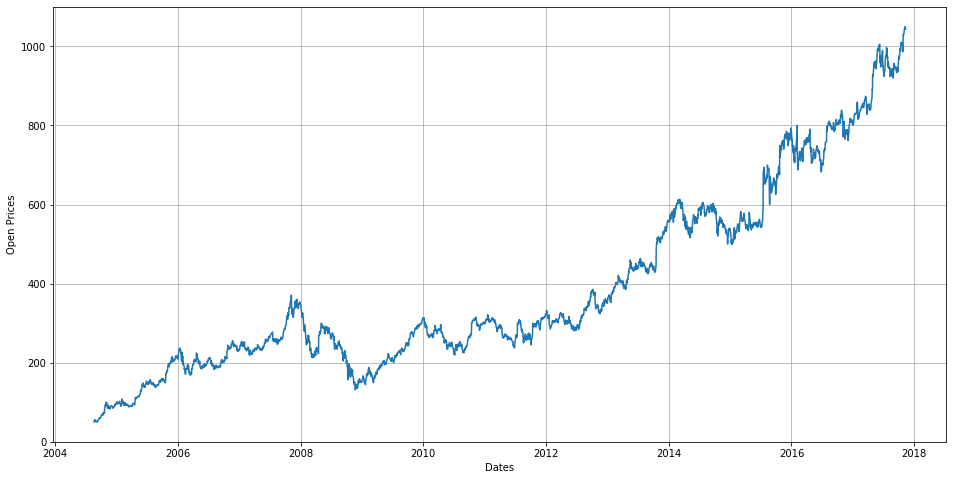

In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('D:/Data Science Methods and Tools/Data Science Project/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/googl.us.txt', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
plt.figure(figsize = (16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'])
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_Visualization.pdf')

### Autocorrelation 

No handles with labels found to put in legend.


Autocorrelation plot with original data
             Open      High       Low     Close    Volume  OpenInt
Open     1.000000  0.999904  0.999855  0.999766 -0.560345      NaN
High     0.999904  1.000000  0.999843  0.999878 -0.558848      NaN
Low      0.999855  0.999843  1.000000  0.999905 -0.563017      NaN
Close    0.999766  0.999878  0.999905  1.000000 -0.561025      NaN
Volume  -0.560345 -0.558848 -0.563017 -0.561025  1.000000      NaN
OpenInt       NaN       NaN       NaN       NaN       NaN      NaN


Autocorrelation plot with parameters t+1 and t-1
          t-1       t+1
t-1  1.000000  0.966446
t+1  0.966446  1.000000


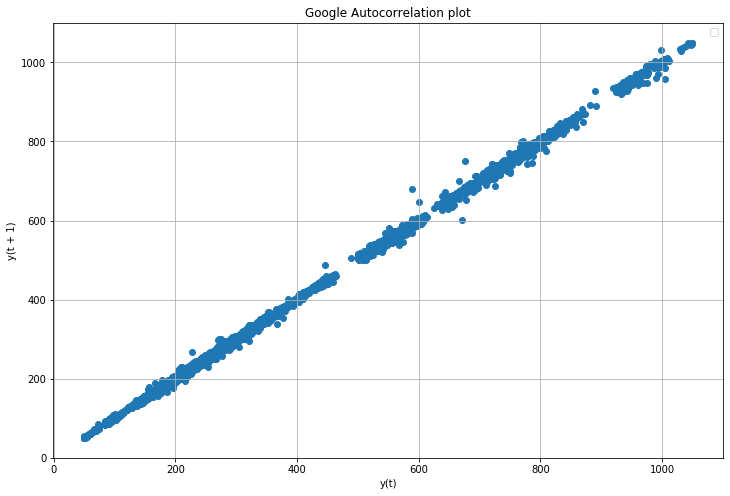

In [11]:
import pandas.plotting as pplot
plt.figure(figsize = (12,8))
pplot.lag_plot(data['Open'], lag = 1)
plt.title('Google Autocorrelation plot')
plt.grid(True)
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_Autocorrelation.pdf')
plt.legend();

values = pd.DataFrame(data['Open'].values)
df = pd.concat([values.shift(120), values], axis= 1)
df.columns = ['t-1','t+1']
print("Autocorrelation plot with original data")
data_corr = data.corr()
print(data_corr)
print("\n")
print("Autocorrelation plot with parameters t+1 and t-1")
result = df.corr()
print(result)

### Splitting the data 

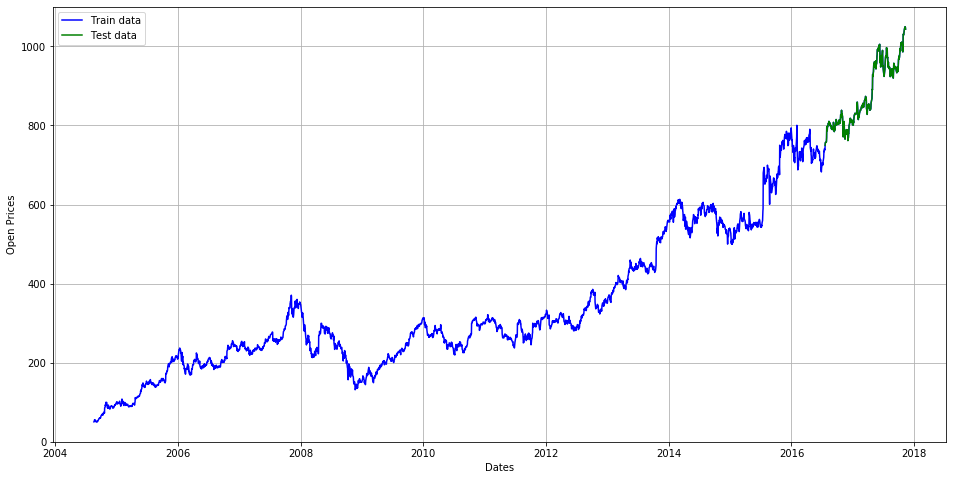

In [12]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize = (16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'blue', label='Train data')
plt.plot(test_data['Open'], 'green', label='Test data')
plt.legend()
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_Data_Split.pdf')

### Autoregression model

In [13]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

train_ar = train_data['Open']
test_ar = test_data['Open']
#Train autoregression model
model = AR(train_ar)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
#Walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))    

C:\Users\verle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


predicted=736.394420, expected=749.870000
predicted=748.615159, expected=754.050000
predicted=754.741616, expected=757.000000
predicted=756.075870, expected=757.320000
predicted=756.538685, expected=757.680000
predicted=757.736476, expected=757.520000
predicted=757.836521, expected=758.970000
predicted=758.055911, expected=768.840000
predicted=770.120272, expected=797.710000
predicted=798.321755, expected=786.670000
predicted=787.544532, expected=797.330000
predicted=796.368873, expected=796.470000
predicted=795.904366, expected=798.240000
predicted=797.282980, expected=800.110000
predicted=800.919221, expected=806.000000
predicted=806.195760, expected=804.490000
predicted=805.012422, expected=807.050000
predicted=807.243973, expected=810.470000
predicted=810.660362, expected=805.090000
predicted=803.247146, expected=807.210000
predicted=808.271965, expected=803.500000
predicted=803.290994, expected=800.000000
predicted=800.956950, expected=805.360000
predicted=805.142958, expected=799

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(test_data['Open'], predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Open'], predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Open'], predictions))
print('RMSE: '+str(rmse))

MSE: 78.49759192800964
MAE: 6.42544822879294
RMSE: 8.85988667692819


Lag: 28


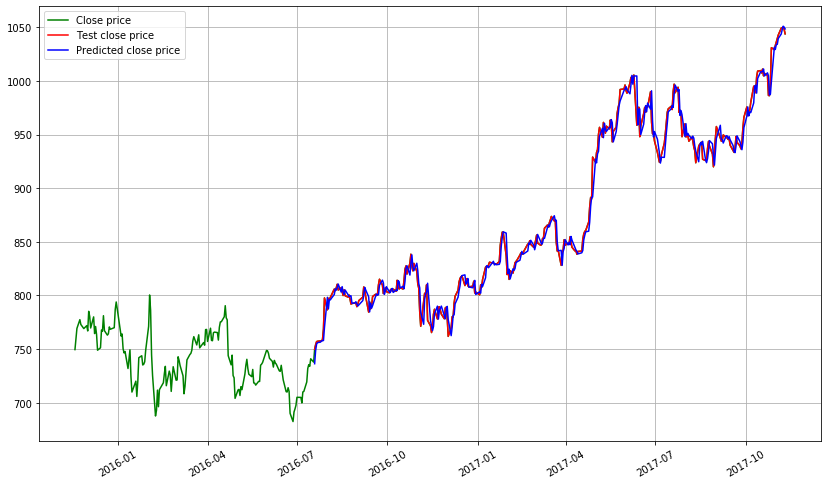

In [15]:
plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(data.index[-500:], data['Open'].tail(500), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend() 
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_Autocorrelation_2.pdf')

### ARIMA Model

<Figure size 1152x576 with 0 Axes>

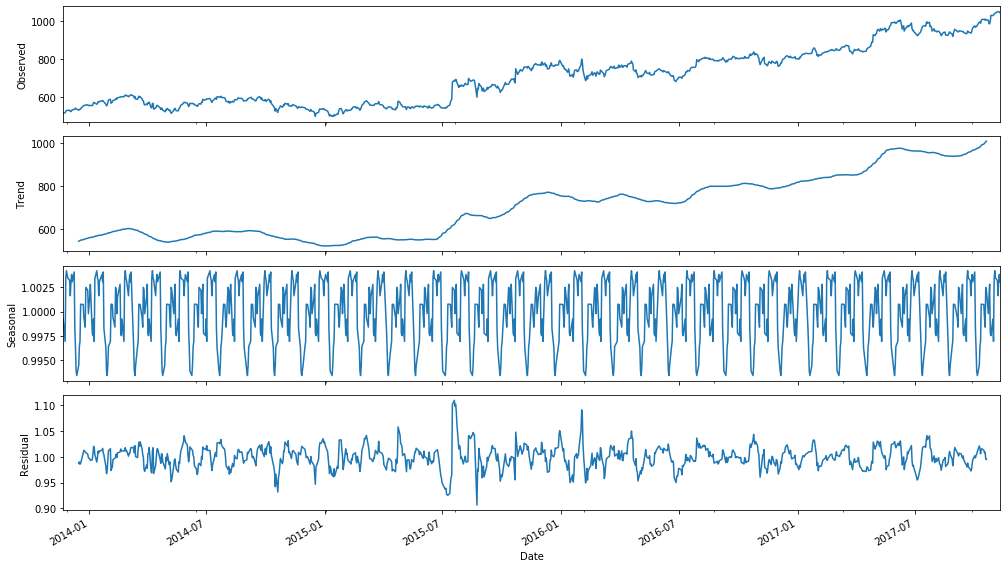

<Figure size 1008x576 with 0 Axes>

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = data['Open']
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_ARIMA_Model.pdf')

In [17]:
train_arima = train_data['Open']
test_arima = test_data['Open']

history = [x for x in train_arima]
y = test_arima
#Making first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
for i in range(1, len(y)):
    #Predicting
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    #Inverting
    predictions.append(yhat)
    #Observation
    obs = y[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=749.887614, expected=754.050000
predicted=754.213630, expected=757.000000
predicted=757.186936, expected=757.320000
predicted=757.554103, expected=757.680000
predicted=757.913427, expected=757.520000
predicted=757.762611, expected=758.970000
predicted=759.184168, expected=768.840000
predicted=768.907420, expected=797.710000
predicted=797.511575, expected=786.670000
predicted=787.118883, expected=797.330000
predicted=797.380684, expected=796.470000
predicted=796.739115, expected=798.240000
predicted=798.459480, expected=800.110000
predicted=800.328152, expected=806.000000
predicted=806.143871, expected=804.490000
predicted=804.773871, expected=807.050000
predicted=807.257023, expected=810.470000
predicted=810.661864, expected=805.090000
predicted=805.448197, expected=807.210000
predicted=807.424924, expected=803.500000
predicted=803.826020, expected=800.000000
predicted=800.320253, expected=805.360000
predicted=805.511242, expected=799.790000
predicted=800.151937, expected=798

In [18]:
#Performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 78.41953018984606
MAE: 6.249253620756248
RMSE: 8.855480234851527


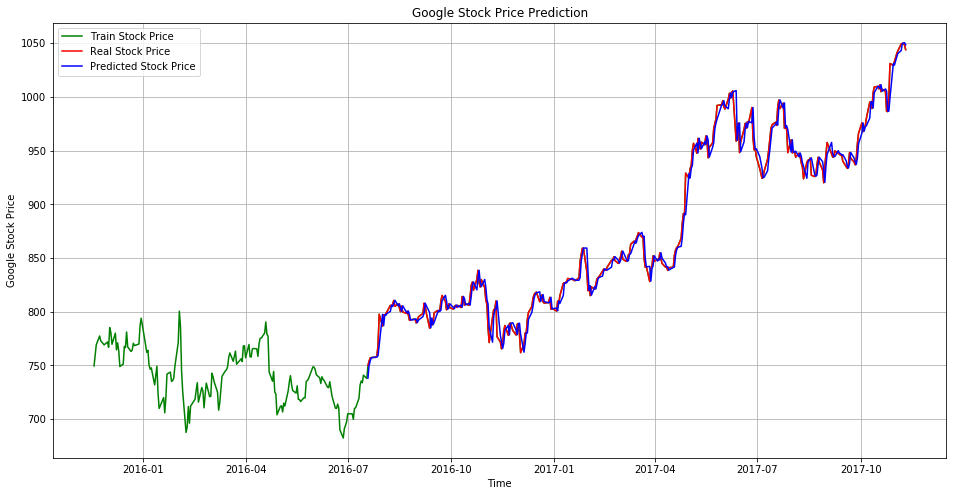

<Figure size 1008x576 with 0 Axes>

In [19]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-500:], data['Open'].tail(500), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_ARIMA2.pdf')

### RNN

In [20]:
train = train_data.iloc[:, 0:1].values 
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) # we take 30 previous prices
    y_train.append(train_scaled[i, 0]) # and 60-th price as y value
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from numpy.random import seed
seed(2019)

In [21]:
model = Sequential()

# Adding the first LSTM layer
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.20))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Train on 2992 samples
Epoch 1/40
2992/2992 [==============================] - 22s 7ms/sample - loss: 0.0262
Epoch 2/40
2992/2992 [==============================] - 6s 2ms/sample - loss: 0.0029
Epoch 3/40
2992/2992 [==============================] - 5s 2ms/sample - loss: 0.0026
Epoch 4/40
2992/2992 [==============================] - 6s 2ms/sample - loss: 0.0021
Epoch 5/40
2992/2992 [==============================] - 6s 2ms/sample - loss: 0.0022
Epoch 6/40
2992/2992 [==============================] - 5s 2ms/sample - loss: 0.0024
Epoch 7/40
2992/2992 [==============================] - 6s 2ms/sample - loss: 0.0020
Epoch 8/40
2992/2992 [==============================] - 5s 2ms/sample - loss: 0.0018
Epoch 9/40
2992/2992 [==============================] - 7s 2ms/sample - loss: 0.0019
Epoch 10/40
2992/2992 [==============================] - 6s 2ms/sample - loss: 0.0022
Epoch 11/40
2992/2992 [==============================] - 5s 2ms/sample - loss: 0.0019
Epoch 12/40
2992/2992 [=================

In [22]:
#We will use this while comparing and visualization
real_stock_price = test_data.iloc[:,0:1].values

In [23]:
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [24]:
test_data.shape

(334, 6)

In [25]:
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

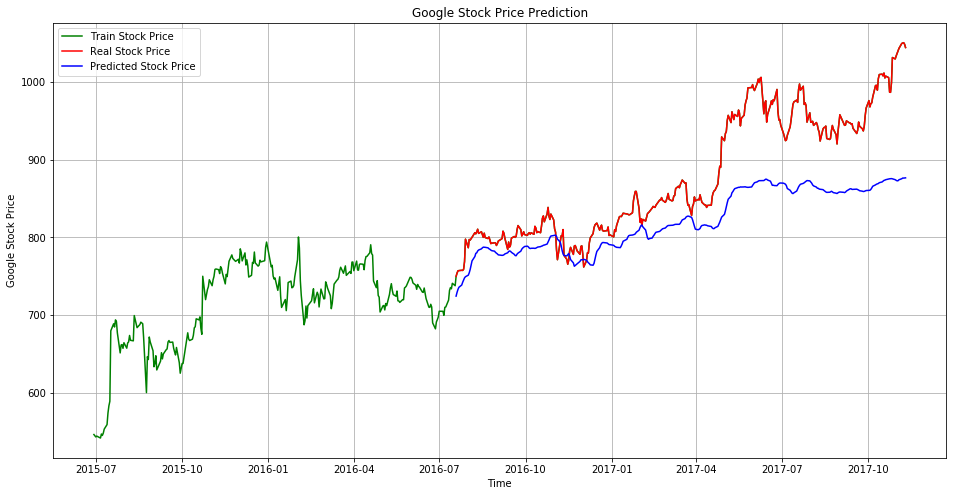

MSE: 5240.6285325609615
MAE: 58.18394322195452
RMSE: 72.3921855766281


<Figure size 1008x576 with 0 Axes>

In [26]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse))

plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_RNN.pdf')

### Linear Regression

In [27]:
# Import the libraries for linear regression
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns    

In [28]:
filename = 'D:/Data Science Methods and Tools/Data Science Project/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/googl.us.txt'
Googlefile = pd.read_csv(filename,sep=',',index_col='Date')

# Prices is the predict value and initial the independet variable (y)
closeprice = Googlefile['Close'].tolist()
initialprice = (Googlefile['Open']).tolist()
 
#Convert to 1d Vector
closeprice = np.reshape(closeprice, (len(closeprice), 1))
initialprice = np.reshape(initialprice, (len(initialprice), 1))

Googlefile.head(5)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2004-08-19,50.000,52.03,47.980,50.170,44703800,0
2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2004-08-23,55.375,56.74,54.525,54.700,18274400,0
2004-08-24,55.620,55.80,51.785,52.435,15262600,0
2004-08-25,52.480,54.00,51.940,53.000,9197800,0


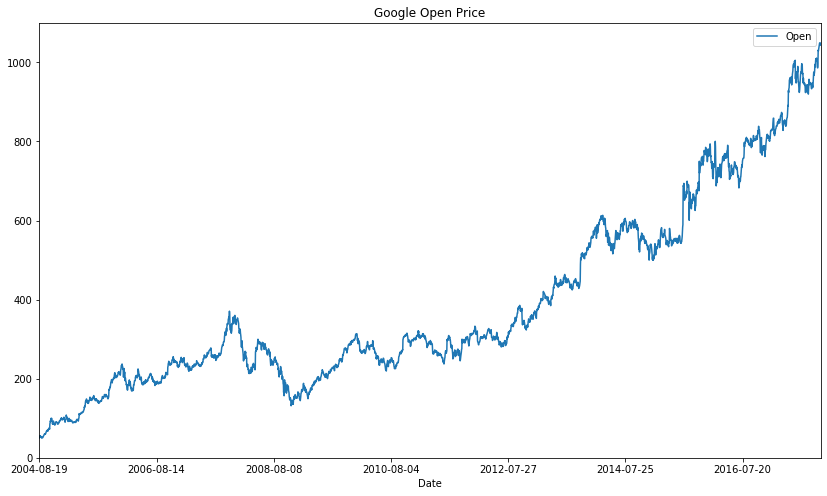

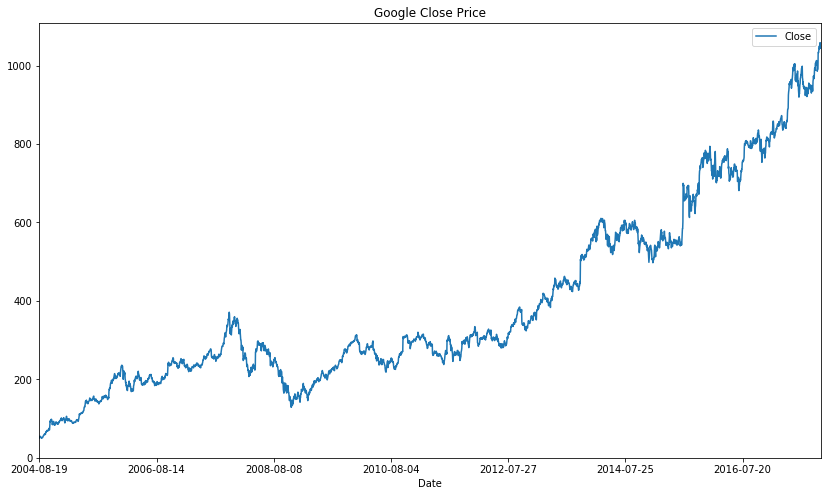

<Figure size 1008x576 with 0 Axes>

In [29]:
Googlefile[['Open']].plot()
plt.title('Google Open Price')
plt.show()
Googlefile[['Close']].plot()
plt.title('Google Close Price')
plt.show()
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_Open_Price.pdf')
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_Close_Price.pdf')

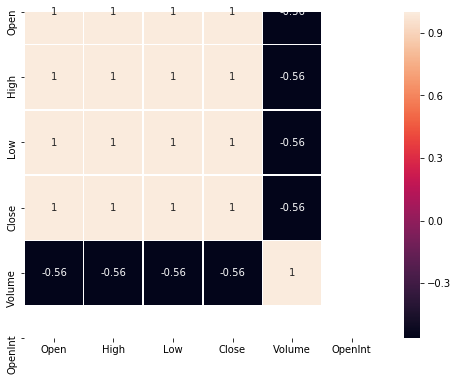

In [30]:
#Plotting heatmap 
plt.subplots(figsize=(8,6))
sns.heatmap(Googlefile.corr(),annot=True, linewidth=.5,)
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Heatmap.pdf')

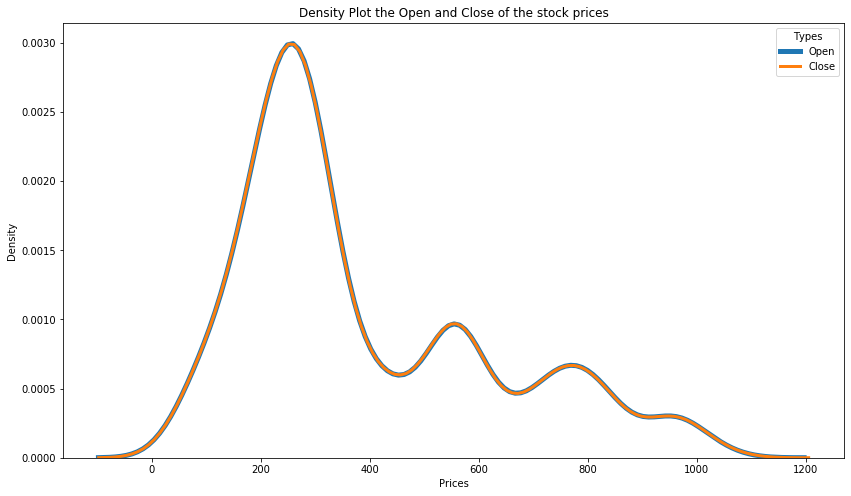

In [31]:
sns.distplot(Googlefile['Open'], hist = False, kde = True, kde_kws = {'linewidth': 5},label='Open',) 
sns.distplot(Googlefile['Close'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='Close') 
plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot the Open and Close of the stock prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Density_Plot_Open_Close.pdf')

Train-set / R2 score: 0.999517054625807


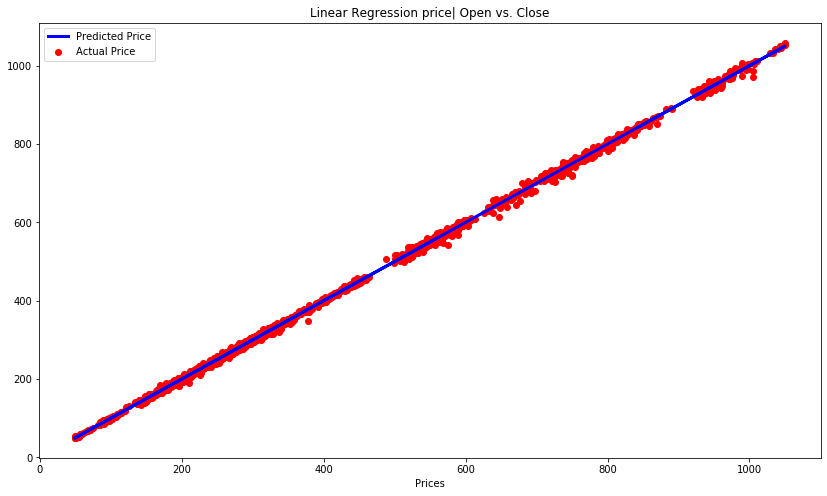

Test-set/ R2 score: 0.9995587960157051


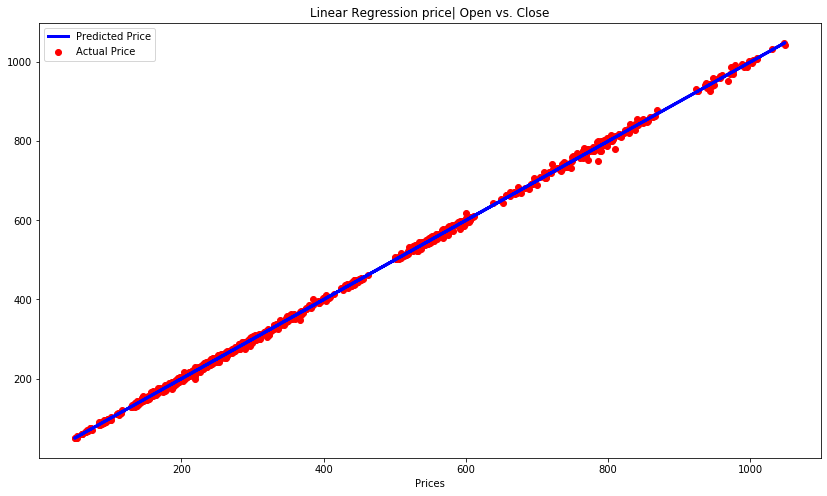

<Figure size 1008x576 with 0 Axes>

In [32]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(initialprice, closeprice, test_size=0.33, random_state=42)
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
 
#Train Set Graph
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()
 
#Test Set Graph
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()
plt.savefig('D:/Data Science Methods and Tools/Data Science Project/Google_Linear_Regression.pdf')